In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sb

In [17]:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

print(pd.Categorical(train["attribute_0"]))
print(pd.Categorical(test["attribute_0"]))

['material_7', 'material_7', 'material_7', 'material_7', 'material_7', ..., 'material_7', 'material_7', 'material_7', 'material_7', 'material_7']
Length: 26570
Categories (2, object): ['material_5', 'material_7']
['material_5', 'material_5', 'material_5', 'material_5', 'material_5', ..., 'material_7', 'material_7', 'material_7', 'material_7', 'material_7']
Length: 20775
Categories (2, object): ['material_5', 'material_7']


In [18]:
train = train.drop(["id","product_code","attribute_2","attribute_1"], axis = 1)
test = test.drop(["id","product_code","attribute_2","attribute_1"], axis = 1)

In [19]:
train = pd.get_dummies(train)

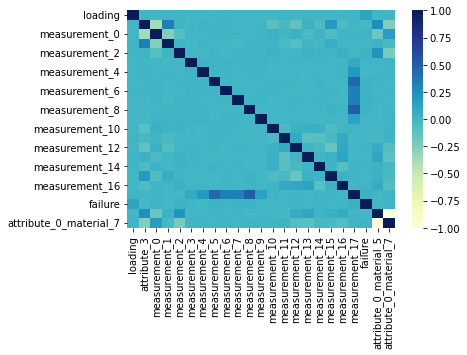

In [21]:
correlation = train.corr()
dataplot = sb.heatmap(correlation, cmap="YlGnBu", annot=False)

In [41]:
labels = np.array(train["failure"])
features = train.drop("failure",axis = 1)
feature_names = list(features.columns)
features = np.array(features)

listeName = 

def select_column(name,threshold):
    liste_tmp = []
    for col in listeName:
        if abs(correlation[name][col])>threshold:
            liste_tmp.append(col)
    liste_tmp.remove(name)
    liste_tmp.append(name)
    return liste_tmp





test = pd.get_dummies(test)
test = np.array(test)
test = imp_mean.fit_transform(test)


print(features.shape)
print(test.shape)

(26570, 22)
(20775, 22)


In [42]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.10)

In [43]:
print(train_features)

[[ 85.1     9.      5.    ... 606.373   0.      1.   ]
 [122.8     8.      5.    ... 843.261   0.      1.   ]
 [117.06    6.     10.    ... 834.699   0.      1.   ]
 ...
 [173.11    9.      7.    ... 922.329   0.      1.   ]
 [149.38    8.     12.    ... 664.724   0.      1.   ]
 [143.97    8.      9.    ... 686.261   1.      0.   ]]


In [44]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);

In [45]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)

In [46]:
error = abs(predictions.round()-test_labels)
print(error.sum()/len(error))

0.22544222807677833


In [47]:
result = rf.predict(test).round()

In [50]:
submission["failure"] = result
print(submission)


          id  failure
0      26570      0.0
1      26571      0.0
2      26572      0.0
3      26573      0.0
4      26574      0.0
...      ...      ...
20770  47340      0.0
20771  47341      0.0
20772  47342      0.0
20773  47343      0.0
20774  47344      0.0

[20775 rows x 2 columns]


In [51]:
submission.to_csv("result2.csv",index=False)